In [1]:
library(tidyverse)
library(cowplot)

# Custom package
library(rutils)

-- Attaching packages ------------------------------------------------------------------------------- tidyverse 1.3.0 --

v ggplot2 3.3.3     v purrr   0.3.4
v tibble  3.0.6     v dplyr   1.0.4
v tidyr   1.1.2     v stringr 1.4.0
v readr   1.4.0     v forcats 0.5.1

-- Conflicts ---------------------------------------------------------------------------------- tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()



In [2]:
dirs <- rutils::get_dev_directories(dev_paths_file = "../dev_paths.txt")
unified_dsets <- c("unified_cervical_data", "unified_uterine_data", "unified_uterine_endometrial_data")
projects <- c("CESC", "UCS", "UCEC")

In [3]:
text_size <- 8
label_text_size <- 8
small_text_size <- 8
family <- "ArialMT"
dpi <- 320
ht <- 4.5
wd <- 6

In [4]:
enrichment_figs <- list()
for (idx in 1:3) {
    enrichment_figs[[projects[idx]]] <- load(paste0(dirs$figures_dir, "/saved_obj/", unified_dsets[idx], "_enrichment_plots.RData"))
}
enrichment_figs <- Reduce(c, enrichment_figs)

In [5]:
enrichment_figs

[1] "CESC_deg_goplot"        "CESC_deg_keggplot"      "CESC_demg_goplot"      
 [4] "CESC_demg_keggplot"     "CESC_figo_goplot"       "CESC_figo_keggplot"    
 [7] "CESC_survival_goplot"   "CESC_survival_keggplot" "UCS_deg_goplot"        
[10] "UCS_deg_keggplot"       "UCS_demg_goplot"        "UCS_demg_keggplot"     
[13] "UCS_figo_goplot"        "UCS_figo_keggplot"      "UCS_survival_goplot"   
[16] "UCS_survival_keggplot"  "UCEC_deg_goplot"        "UCEC_deg_keggplot"     
[19] "UCEC_demg_goplot"       "UCEC_demg_keggplot"     "UCEC_figo_goplot"      
[22] "UCEC_figo_keggplot"     "UCEC_survival_goplot"

In [6]:
hide_axis_title <- function(plt, axis = "x") {
    if (axis == "x") {
        plt <- plt + theme(axis.title.x = element_blank())
    }
    else if (axis == "y") {
        plt <- plt + theme(axis.title.y = element_blank())
    }
    plt
}

set_breaks <- function(plt, lims, break_seq, axis = "y") {
    if (axis == "x") {
        plt <- plt + scale_x_continuous(limits = lims, breaks = break_seq)
    }
    else if (axis == "y") {
        plt <- plt + scale_y_continuous(limits = lims, breaks = break_seq)
    }
    plt
}

set_margins <- function(plt, margins = c(0, 0, 0, 0)) {
    plt + theme(plot.margin = unit(margins, "cm"))
}

In [7]:
ea_goplot_list <- c(
    mget("CESC_figo_goplot") %>% 
        purrr::map(hide_axis_title) %>%
        purrr::map(function(p) { set_breaks(p, c(0, 75), seq(0, 75, 15)) }),
    mget("CESC_survival_goplot") %>% 
        purrr::map(hide_axis_title) %>%
        purrr::map(function(p) { set_breaks(p, c(0, 15), seq(0, 15, 5)) }),
    mget("UCEC_figo_goplot") %>% 
        purrr::map(hide_axis_title) %>%
        purrr::map(function(p) { set_breaks(p, c(0, 75), seq(0, 75, 15)) }),
    mget("UCEC_survival_goplot") %>% 
        purrr::map(hide_axis_title) %>%
        purrr::map(function(p) { set_breaks(p, c(0, 15), seq(0, 15, 5)) }),
    mget("UCS_figo_goplot") %>%
        purrr::map(function(p) { set_breaks(p, c(0, 75), seq(0, 75, 15)) }),
    mget("UCS_survival_goplot") %>%
        purrr::map(function(p) { set_breaks(p, c(0, 15), seq(0, 15, 5)) })
) %>%
#     purrr::map(function(p) { set_breaks(p, c(0, 25), seq(0, 25, 5)) }) %>%
    purrr::map(function(p) { set_margins(p, margins = c(0.4, 0.2, 0.0, 0.1)) })


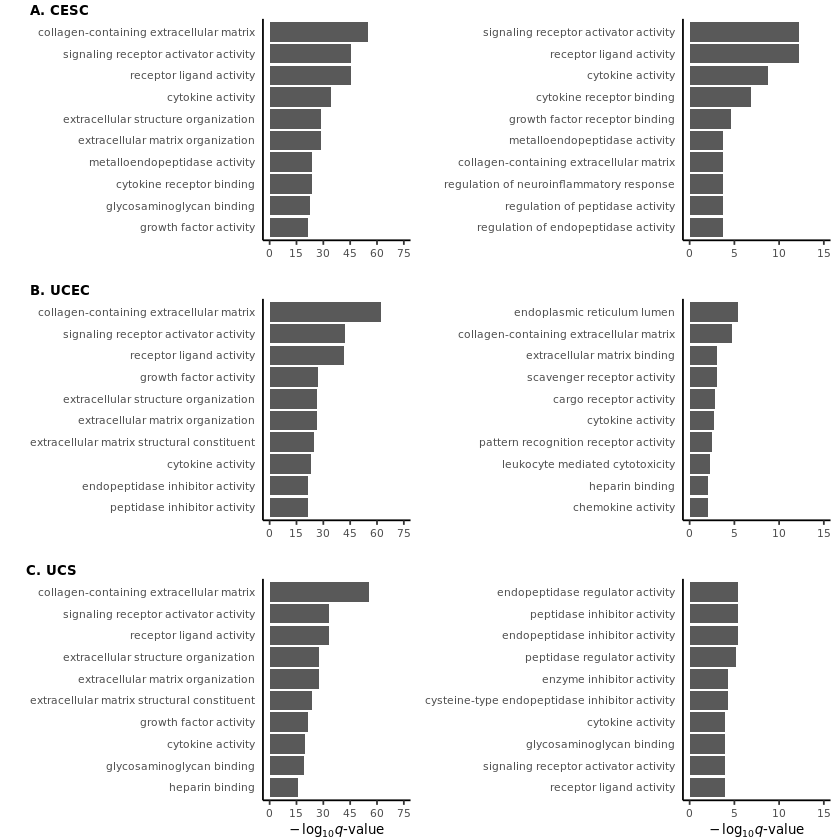

In [8]:
eaplot_grid <- plot_grid(
    ea_goplot_list[[1]],
    ea_goplot_list[[2]],
    ea_goplot_list[[3]],
    ea_goplot_list[[4]],
    ea_goplot_list[[5]],
    ea_goplot_list[[6]],
    nrow = 3,
    ncol = 2,
    align = "vh",
    labels = c("A. CESC", "", "B. UCEC", "", "C. UCS"),
    label_size = label_text_size,
    label_fontfamily = family
#     label_y = -0.1
)

# earow_1 <- plot_grid(
#     ea_goplot_list[[1]],
#     ea_goplot_list[[2]],
#     nrow = 1,
#     align = "vh",
#     labels = c("A. CESC", ""),
#     label_size = label_text_size,
#     label_fontfamily = family,
# #     label_y = -0.1,
#     hjust = -0.1
# )

# earow_2 <- plot_grid(
#     ea_goplot_list[[3]],
#     ea_goplot_list[[4]],
#     nrow = 1,
#     align = "vh",
#     labels = c("B. UCEC", ""),
#     label_size = label_text_size,
#     label_fontfamily = family,
# #     label_y = -0.1,
#     hjust = -0.1
# )

# earow_3 <- plot_grid(
#     ea_goplot_list[[5]],
#     ea_goplot_list[[6]],
#     nrow = 1,
#     align = "vh",
#     labels = c("C. UCS", ""),
#     label_size = label_text_size,
#     label_fontfamily = family,
# #     label_y = -0.1,
#     hjust = -0.1
# )

# eaplot_grid <- plot_grid(
#     earow_1 + theme(plot.margin = unit(c(0.025, -0.1, 0.0, -0.1), "cm"), plot.background = element_rect(color = "gray80", size = 3)),
#     earow_2 + theme(plot.margin = unit(c(0.025, -0.1, 0.0, -0.1), "cm"), plot.background = element_rect(color = "gray80", size = 3)),
#     earow_3 + theme(plot.margin = unit(c(0.025, -0.1, 0.0, -0.1), "cm"), plot.background = element_rect(color = "gray80", size = 3)),
#     nrow = 3
# )
eaplot_grid

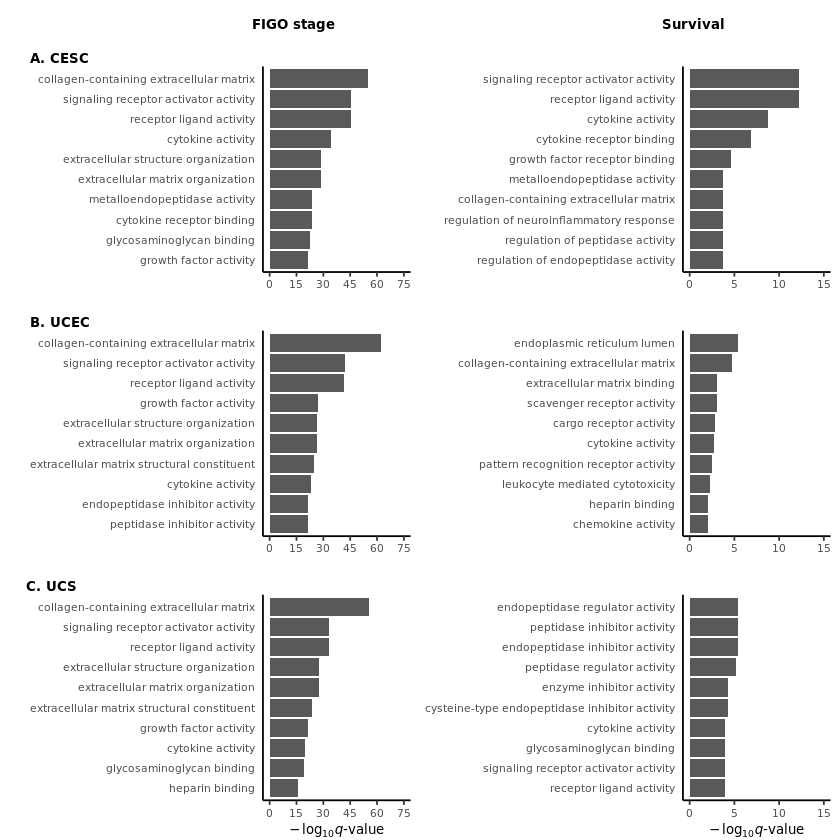

In [9]:
fig6 <- plot_grid(
    plot_grid(NULL, NULL, labels = c("FIGO stage", "Survival"), ncol = 2, label_size = label_text_size, label_fontfamily = family, label_x = 0.5, label_y = 0.7),
    eaplot_grid,
    nrow = 2,
    rel_heights = c(0.06, 1)
)
fig6

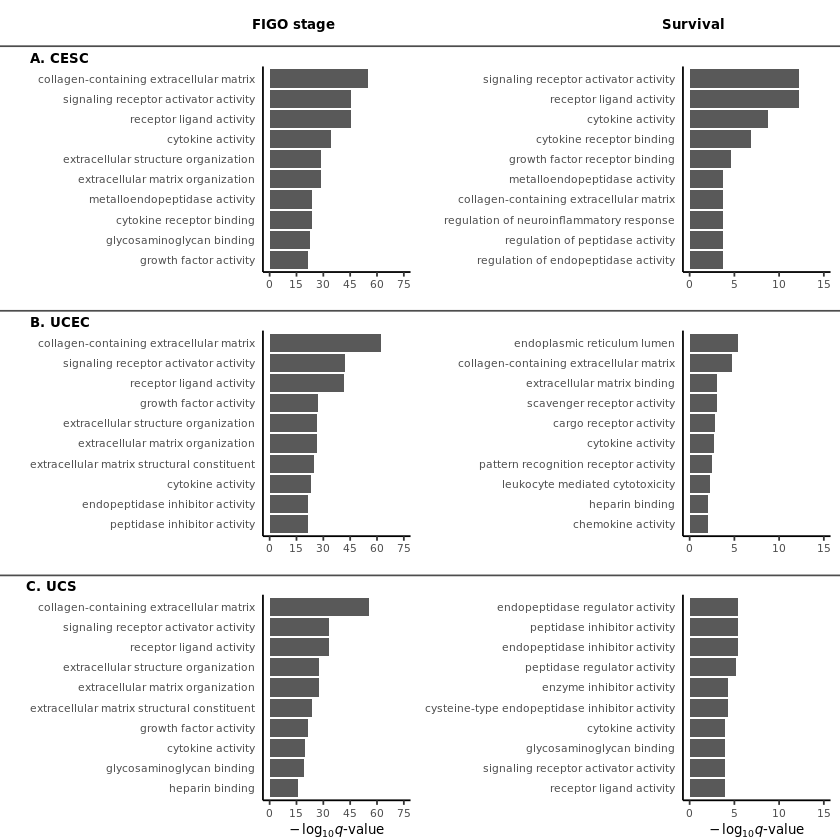

In [10]:
fig6 <- fig6 +
    geom_hline(aes(yintercept = 0.315), color = "gray30") +
    geom_hline(aes(yintercept = 0.315 * 2), color = "gray30") +
    geom_hline(aes(yintercept = 0.315 * 3), color = "gray30")

fig6

In [11]:
ggsave(fig6, filename = paste0(dirs$figures_dir, "/paneled/figure6.png"), dpi = dpi, height = ht, width = wd)